In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util.dtype import img_as_float
img = data.camera()
img = img_as_float(img)
height = img.shape[0]
width = img.shape[1]

In [7]:
def ILPF(D0): 
    #1.位移
    fimg = np.zeros_like(img)
    for i in range(height):
        for j in range(width):
            fimg[i,j]=img[i,j]*((-1)**(i+j))
    #2.dft
    fimg = np.fft.fft2(fimg)
    #3.滤波
    #低通滤波
    mask = np.ones_like(img)

    hh = mask.shape[0]
    ww = mask.shape[1]
    ch = int(hh/2.0)#取整
    cw = int(ww/2.0)

    for i in range(hh):
        for j in range(ww):
            if np.sqrt((i-ch)**2+(j-cw)**2)<=D0:
                mask[i,j]=1
    fimg = fimg * mask

    #4.逆变换
    iimg=np.fft.ifft2(fimg)

    #5.取实部
    iimg=np.real(iimg)

    #6.恢复
    for i in range(height):
        for j in range(width):
            iimg[i,j]=iimg[i,j]*((-1)**(i+j))
    iimg=np.abs(iimg)
    return iimg

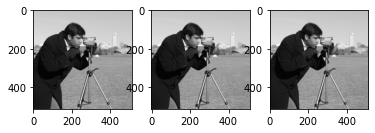

In [9]:
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')

plt.subplot(1,3,2)
plt.imshow(ILPF(100),cmap='gray')

plt.subplot(1,3,3)
plt.imshow(ILPF(1000),cmap='gray')
plt.show()